## Monte Carlo Simulation Frontier
    Introduction to Monte Carlo simulation
    APplying Monte Carlo Simulation on portfolios using Sharpe Ratio
    Create Efficient Frontier based on Sharpe Ratio

# Introduction to Monte Carlo Simulation 

In [12]:
import numpy as np


In [32]:
import random
def roll_dice():
    return np.sum(np.random.randint(1,7,2))

In [41]:
roll_dice()

5

In [49]:
 def monte_carlo_simulation(runs=1000):
        results = np.zeros(2)
        for _ in range(runs):
            if roll_dice()==7:
                results[0]+=1
            else:
                results[1]+=1
        return results

In [66]:
monte_carlo_simulation()

array([179., 821.])

In [63]:
np.zeros(2)

array([0., 0.])

In [52]:
181*5

905

In [54]:
157*5

785

In [69]:
results = np.zeros(1000)
for i in range(1000):
    results[i]=monte_carlo_simulation()[0]

In [72]:
results 

array([160., 162., 156., 184., 166., 173., 153., 170., 168., 167., 153.,
       169., 162., 161., 168., 176., 150., 171., 156., 162., 174., 186.,
       176., 174., 154., 184., 173., 172., 185., 154., 142., 173., 194.,
       173., 184., 163., 153., 163., 173., 173., 158., 173., 161., 183.,
       165., 169., 176., 182., 165., 158., 163., 151., 191., 168., 174.,
       163., 154., 183., 162., 170., 169., 144., 171., 167., 169., 188.,
       162., 162., 166., 171., 170., 160., 179., 147., 162., 164., 179.,
       161., 158., 144., 165., 149., 153., 176., 165., 163., 186., 178.,
       150., 163., 172., 182., 152., 158., 176., 160., 159., 149., 185.,
       170., 149., 169., 171., 183., 160., 164., 166., 171., 149., 196.,
       167., 175., 144., 160., 168., 145., 151., 165., 183., 134., 175.,
       154., 159., 158., 166., 171., 157., 136., 174., 172., 196., 164.,
       155., 186., 162., 170., 153., 175., 165., 173., 178., 165., 162.,
       170., 160., 167., 195., 187., 170., 172., 17

In [71]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


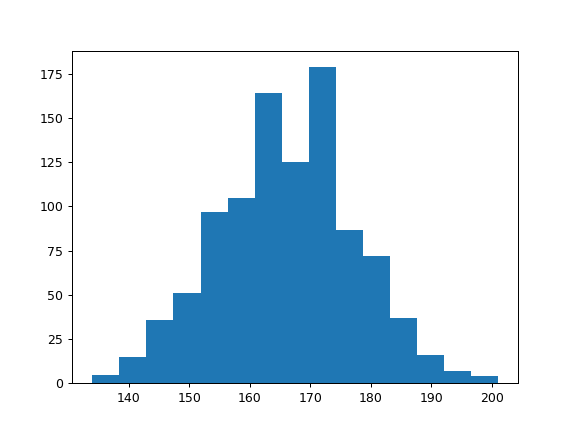

(array([  5.,  15.,  36.,  51.,  97., 105., 164., 125., 179.,  87.,  72.,
         37.,  16.,   7.,   4.]),
 array([134.        , 138.46666667, 142.93333333, 147.4       ,
        151.86666667, 156.33333333, 160.8       , 165.26666667,
        169.73333333, 174.2       , 178.66666667, 183.13333333,
        187.6       , 192.06666667, 196.53333333, 201.        ]),
 <BarContainer object of 15 artists>)

In [73]:
fig, ax = plt.subplots()
ax.hist(results, bins = 15)


In [75]:
results.mean()*5

830.71

In [77]:
1000 - results.mean()

833.858

In [78]:
results.mean()/1000

0.16614199999999998

In [83]:
d1 = np.arange(1, 7)
d2 = np.arange(1, 7)

In [84]:
mat = np.add.outer(d1,d2)

In [85]:
mat

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [87]:
mat.size

36

In [88]:
mat[mat==7].size

6

In [89]:
mat[mat==7].size/mat.size

0.16666666666666666

### Monte Carlo Simulation with Portfolios and Sharpe Ratio 

In [92]:
import pandas_datareader as pdr
import datetime as dt 
import pandas as pd 

In [93]:
tickers = ['AAPL','MSFT','TWTR','IBM']
start = dt.datetime(2022,1,1)

data = pdr.get_data_yahoo(tickers, start)

In [94]:
data = data ['Adj Close']

In [95]:
data.head()

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2022-01-03,181.778397,334.059265,42.660000,134.420822
2022-01-04,179.471344,328.331116,40.849998,136.377274
2022-01-05,174.697418,315.727173,39.500000,136.574890
2022-01-06,171.781143,313.232330,39.590000,133.729156
2022-01-07,171.950928,313.391998,39.669998,133.225235


In [96]:
log_returns = np.log(data/data.shift())

In [97]:
log_returns

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,-0.012773,-0.017296,-0.043355,0.014450
2022-01-05,-0.026960,-0.039144,-0.033606,0.001448
2022-01-06,-0.016834,-0.007933,0.002276,-0.021057
2022-01-07,0.000988,0.000510,0.002019,-0.003775
2022-01-10,0.000116,0.000732,0.007534,0.001482
2022-01-11,0.016644,0.002257,0.017116,-0.016126
2022-01-12,0.002567,0.010391,-0.010135,0.005404
2022-01-13,-0.019211,-0.043244,-0.039270,0.008720


In [99]:
weight = np.random.random(4)
weight/= weight.sum()
weight

array([0.00099634, 0.19874763, 0.29908532, 0.50117071])

In [100]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [104]:
exp_vol = np.sqrt(np.dot(weight.T,np.dot(log_returns.cov()*252,weight)))

In [106]:
sharpe_ratio = exp_rtn/exp_vol

In [108]:
sharpe_ratio

-2.468338280676947

In [120]:
# Monte Carlo Simulation 
n = 5000
weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range (n):
    weight = np.random.random(4)
    weight/= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T,np.dot(log_returns.cov()*252,weight)))
    sharpe_ratios[i] = exp_rtns[i]/exp_vols[i]

In [134]:
sharpe_ratios.max()

-1.952107954268094

In [135]:
sharpe_ratios.argmax()

2591

In [136]:
weights[2591]

array([0.04139342, 0.08651953, 0.84383801, 0.02824903])

In [137]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


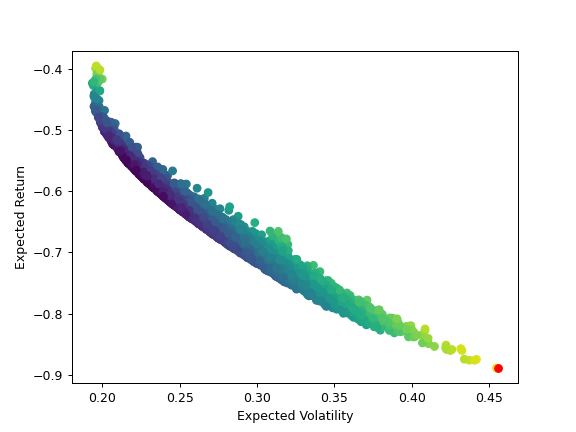

Text(0, 0.5, 'Expected Return')

In [139]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')